In [2]:
'''
This script is demo for one-one corresponding dataset with
CCA-zoo implemented MCCA, to estimate the PI
'''
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import scipy.io
mat = scipy.io.loadmat("Wiki_embeddings/wikiGraph.mat")
print(mat['network'])

FileNotFoundError: [Errno 2] No such file or directory: 'Wiki_embeddings/Wiki_embeddings/wikiGraph.mat'

In [1]:
#################################
#    Function for MAXVAR MCCA   #
#################################

from cca_zoo.utils.check_values import _process_parameter
from heapq import nlargest

def MAXVAR_MCCA(X, Y, PI):
    '''
    update the projections by Max-of-Variance MCCA
    input: X --> the first dataset
           Y --> the second dataset
           PI --> the estimated permutation matrix
    Output: U --> the projection matrix for dataset X
            V --> the projection matrix for dataset Y
            S --> the common resource matrix
    '''
    # common termed to be used
    YPI = np.dot(Y, PI)
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    YPI_YPIT_inv = np.linalg.inv(np.dot(YPI, YPI.T))
    
    # estimate the common resource matrix S
    f_1 = np.dot(X.T, np.dot(XXT_inv, X))
    f_2 = np.dot(YPI.T, np.dot(YPI_YPIT_inv, YPI))
    f = 0.02 * f_1 + f_2
    # Compute the Eigenvectors and eigenvalues for function f, as complex numbers
    eigenvalues, eigenvectors = np.linalg.eig(f)
    # only takes the real part of the complex numbers
    eigenvalues = eigenvalues.real.tolist()
    eigenvectors = eigenvectors.real
    # the first d columns of eigenvectors should be the values of S
    largest_eigen = nlargest(latent_dims, eigenvalues)
    S = []
    for principal_eigenvalue in largest_eigen:
        eigen_idx = eigenvalues.index(principal_eigenvalue)
        eigen_vec = eigenvectors[eigen_idx]
        S.append(eigen_vec)
    # convert the S matrix into array
    S = np.array(S)
    
    # estimate the projections U and V
    U = np.dot(XXT_inv, np.dot(X, S.T))
    V = np.dot(YPI_YPIT_inv, np.dot(YPI, S.T))
    
    return U, V, S

In [3]:
#####################################################
#          Test the procrustes.permutation          #
#    Test with wiki_dw128 and wiki_dw200 datasets   #
#####################################################

from scipy.optimize import minimize
from scipy.stats import entropy
from scipy.optimize import Bounds
import scipy
from scipy.spatial import procrustes

from pathlib import Path
from procrustes import permutation

print("### Experiment of data NO index feature!! ###")
### evaluate the permutation with Wiki_embeddings, NO 
df128 = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw128.txt', delimiter = ' ', skiprows = 1, usecols=range(1, 129)).T
df200 = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw200.txt', delimiter = ' ', skiprows = 1, usecols=range(1, 201)).T
print("# df-128 is of size : ", df128.shape)
print(df128)
print("# df-200 is of size : ", df200.shape)
print(df200)

esti_PI_NoIdx = permutation(df128, df200, pad=True)

print("# the permutation matrix is: ")
print(esti_PI_NoIdx.t)
print("# the A*P is: ")
print(np.dot(df128, esti_PI_NoIdx.t))
print("# the B is: ")
print(df200)

### Experiment of data NO index feature!! ###
# df-128 is of size :  (128, 2405)
[[-2.9664550e-01 -3.0697235e-01 -1.9261949e-01 ...  1.6052672e-01
  -3.8028070e-01 -1.4412411e+00]
 [ 2.5683755e-01  5.1031332e-02  4.2876366e-01 ... -1.0390278e-01
  -7.8005143e-03 -1.0345765e+00]
 [-8.1791446e-02  1.9682011e-01 -9.1557290e-02 ...  1.8834340e-02
  -2.1594402e-01  2.4774540e+00]
 ...
 [-2.6184088e-01 -2.8352790e-01 -6.2795940e-02 ...  1.8578124e-01
  -1.5014867e-01  5.9148103e-01]
 [-1.6339578e-03 -1.3055106e-01  2.1930984e-01 ... -1.0484107e-01
   1.8645848e-01  1.8861721e-01]
 [ 1.9291838e-01  3.0451250e-01  2.6148596e-01 ...  1.4075616e-01
   4.7732893e-02 -1.4440607e-01]]
# df-200 is of size :  (200, 2405)
[[-2.59307920e-01  8.99237540e-02 -2.39340600e-01 ... -1.49395730e-01
  -1.34092150e-01  1.45191570e-01]
 [ 1.70943110e-01  2.04685850e-01  3.06829570e-01 ... -1.17370740e-01
  -2.20019100e-01  1.15079240e+00]
 [-2.07723660e-01 -2.09222780e-01 -2.00417620e-01 ... -1.39250460e-01
  -2

In [4]:
##########################################
### Permutation evaluation -- NO index ###
##########################################

acc = 0.0
for i in range(2405):
    esti_idx_NoIdx = np.where(esti_PI_NoIdx.t[i]==1)[0][0]
    if esti_idx_NoIdx == i:
        acc += 1
print("# Accuracy of permutation(No index) is: ", acc/2405)

# Accuracy of permutation(No index) is:  0.002494802494802495


In [6]:
#####################################################
#          Test the procrustes.permutation          #
#    Test with wiki_dw128 and wiki_dw200 datasets   #
#                                                   #
#         Re-Order the second wiki_dw200 dataset    #
#####################################################

from scipy.optimize import minimize
from scipy.stats import entropy
from scipy.optimize import Bounds
import scipy
from scipy.spatial import procrustes

from pathlib import Path
from procrustes import permutation

import numpy as np
import random

print("### Experiment of data NO index feature!! ###")
### evaluate the permutation with Wiki_embeddings, NO 
df128_1 = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw128.txt', delimiter = ' ', skiprows = 1, usecols=range(1, 129)).T
df128_2 = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw128.txt', delimiter = ' ', skiprows = 1, usecols=range(1, 129)).T

### reorder the second dataset
reorder = np.array(random.sample(range(2405), 2405))
df128_2 = df128_2[:, reorder]

### generate the true permutatoin
true_PI = np.zeros((2405, 2405))
for i in range(2405):
    true_PI[reorder[i]][i] = 1

esti_PI_NoIdx = permutation(df128_1, df128_2, pad=True)

print("# the permutation matrix is: ")
print(esti_PI_NoIdx.t)
print("# the A*P is: ")
print(np.dot(df128_1, esti_PI_NoIdx.t))
print("# the B is: ")
print(df128_2)

### Experiment of data NO index feature!! ###
# the permutation matrix is: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
# the A*P is: 
[[-0.16881093  0.33562568 -0.7932359  ... -0.46473283  0.42349005
  -0.23097636]
 [ 0.7214768   0.25663763  0.86250967 ... -0.07724786 -0.03296254
   0.21483442]
 [ 0.34590214  0.04908696  0.4308652  ...  0.18875907 -0.26403782
  -0.12742591]
 ...
 [ 0.31486535  0.27726385 -0.60380226 ...  0.05410302 -0.00199011
  -0.24164435]
 [-0.20309035  0.10684483 -0.03188747 ... -0.19829868 -0.39215946
   0.03304206]
 [ 0.1853972  -0.15210658  0.3738823  ...  0.28256106  0.30505264
   0.28513068]]
# the B is: 
[[-0.16881093  0.33562568 -0.7932359  ... -0.46473283  0.42349005
  -0.23097636]
 [ 0.7214768   0.25663763  0.86250967 ... -0.07724786 -0.03296254
   0.21483442]
 [ 0.34590214  0.04908696  0.4308652  ...  0.18875907 -0.26403782
  -0.12742591]
 ...


In [7]:
##########################################
### Permutation evaluation -- NO index ###
##########################################
esti_order = []
true_PI_order = []
acc = 0.0
for i in range(2405):
    esti_idx_NoIdx = np.where(esti_PI_NoIdx.t[i]==1)[0][0]
    true_idx = np.where(true_PI[i]==1)[0][0]
    esti_order.append(esti_idx_NoIdx)
    true_PI_order.append(true_idx)
    if esti_idx_NoIdx == true_idx:
        acc += 1
print("# Accuracy of permutation(No index) is: ", acc/2405)
print("# the true order is : ", np.array(true_PI_order))
print("# the estimated order is : ", np.array(esti_order))

# Accuracy of permutation(No index) is:  1.0
# the true order is :  [1423 2257 1879 ...  963  881  182]
# the estimated order is :  [1423 2257 1879 ...  963  881  182]


/tmp/ipykernel_36051/1181199234.py:57: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if esti_idx == ii:


# Accuracy of iter =  0  is:  0.0


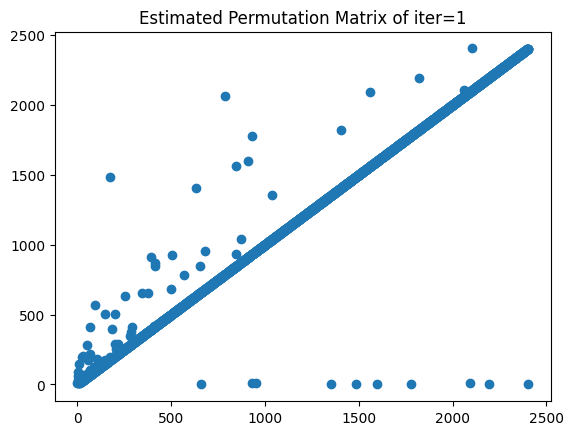

# Accuracy of iter =  1  is:  0.9650727650727651


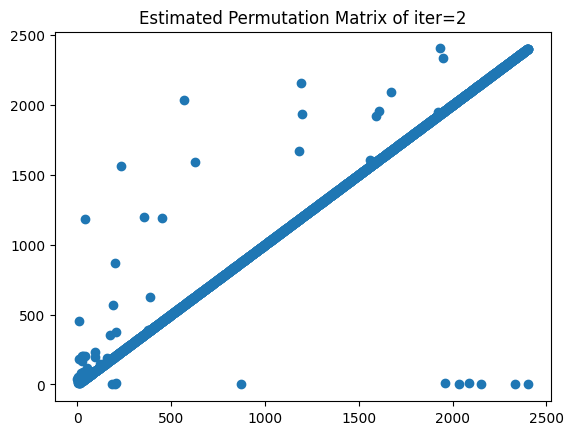

# Accuracy of iter =  2  is:  0.9708939708939709


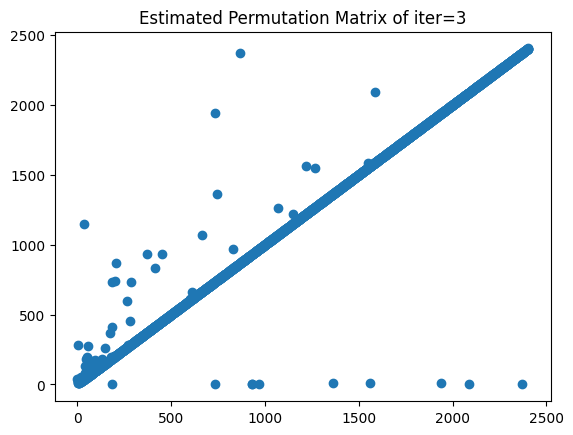

# Accuracy of iter =  3  is:  0.9659043659043659


In [18]:
###########################################
#        Main Part of ACCA algorithm      #
###########################################
import random
import matplotlib.pyplot as plt

### load in the dataset
X = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw128.txt', delimiter = ' ', \
               skiprows = 1, usecols=range(1, 129)).T
Y = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw200.txt', delimiter = ' ', \
               skiprows = 1, usecols=range(1, 201)).T


from heapq import nlargest
import time
import copy
from procrustes import permutation

# the total training iterations
n = 2405
train_epoch = 4
latent_dims = 10

esti_PI_history = []
acc_history = []
for i in range(train_epoch):
    ## estimate the permutation matrix
    t_PI = time.time()
    if i > 0:
        XU = np.dot(X.T, U)
        YV = np.dot(Y.T, V)
        
        esti_PI = permutation(YV.T, S.T)
        esti_PI = np.array(esti_PI.t)
    else:
        # initialize the PI at totally random
        esti_PI = np.zeros((n, n))
        for j in range(int(n)):
            esti_PI[j] = np.random.dirichlet(np.ones(n),size=1)[0]
    t_PI = time.time() - t_PI
    esti_PI_history.append(esti_PI)
    
    ## estimation of the CCA part
    t_CCA = time.time()
    U, V, S = MAXVAR_MCCA(X, Y, esti_PI)
    t_CCA = time.time() - t_CCA
    
    ### evaluate the permutation matrix
    PI = esti_PI_history[i]
    acc = 0.0
    idx_order = []
    esti_PI_order = []
    for ii in range(2405):
        esti_idx = np.where(PI[ii]==1)[0]
        if esti_idx.size > 0:
            esti_idx = esti_idx[0]
        if esti_idx == ii:
            acc += 1
        idx_order.append(ii)
        esti_PI_order.append(esti_idx)
    if i > 0:
        plt.scatter(idx_order, esti_PI_order)
        plt.title("Estimated Permutation Matrix of iter=" + str(i))
        plt.show()
    print("# Accuracy of iter = ", i, " is: ", acc/2405)
    acc_history.append(acc)


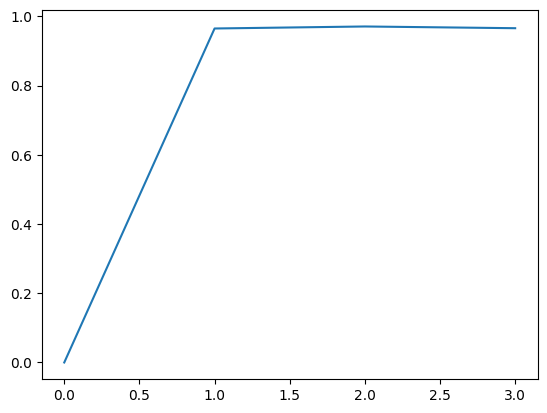

In [19]:
plt.plot(np.array(acc_history) / 2405)

In [30]:
###########################################
#        Main Part of ACCA algorithm      #
###########################################
import random

### load in the dataset
X = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw128.txt', delimiter = ' ', \
               skiprows = 1, usecols=range(1, 129)).T
Y_origin = np.loadtxt('Wiki_embeddings/Wiki_embeddings/wiki_dw200.txt', delimiter = ' ', \
               skiprows = 1, usecols=range(1, 201)).T

### reorder the Y dataset randomly
reorder = np.array(random.sample(range(2405), 2405))
Y = Y_origin[:, reorder]

### generate the true permutatoin
true_PI = np.zeros((2405, 2405))
for i in range(2405):
    true_PI[i][reorder[i]]= 1

print("# Re-arranged Order is : ")
print(reorder)
print("##########################")
print("# evaluate the true PI: ")
eval_true_PI = []
for i in range(2405):
    true_idx = np.where(true_PI[i]==1)[0][0]
    eval_true_PI.append(true_idx)
eval_true_PI = np.array(eval_true_PI)
print(eval_true_PI)
print("##########################")


from heapq import nlargest
import time
import copy
from procrustes import permutation

# the total training iterations
n = 2405
train_epoch = 10
latent_dims = 10

esti_PI_history = []
acc_history = []
VY_S_list = []
VYP_S_list = []
XU_S_list = []
for i in range(train_epoch):
    ## estimate the permutation matrix
    t_PI = time.time()
    if i > 0:
        XU = np.dot(X.T, U)
        YV = np.dot(Y.T, V)
        
        esti_PI = permutation(YV.T, XU.T)
        esti_PI = np.array(esti_PI.t)
        
        VY_S = np.linalg.norm(YV.T-S, ord='fro')
        VYP_S = np.linalg.norm(np.dot(YV.T, esti_PI)-S, ord='fro')
        XU_S = np.linalg.norm(XU.T-S, ord='fro')
        VY_S_list.append(VY_S)
        VYP_S_list.append(VYP_S)
        XU_S_list.append(XU_S)
    else:
        # initialize the PI at totally random
        esti_PI = np.zeros((n, n))
        for j in range(int(n)):
            esti_PI[j] = np.random.dirichlet(np.ones(n),size=1)[0]
    t_PI = time.time() - t_PI
    esti_PI_history.append(esti_PI)
    
    ## estimation of the CCA part
    t_CCA = time.time()
    U, V, S = MAXVAR_MCCA(X, Y, esti_PI)    
    t_CCA = time.time() - t_CCA
    
    ### evaluate the permutation matrix
    PI = esti_PI_history[i]
    acc = 0.0
    idx_order = []
    esti_PI_order = []
    true_PI_order = []
    for ii in range(2405):
        esti_idx = np.where(PI[ii]==1)[0]
        if esti_idx.size > 0:
            esti_idx = esti_idx[0]
        true_idx = np.where(true_PI[ii]==1)[0][0]
        # print("# evaluate-", ii, " : ", esti_idx, " - ", true_idx, " ...")
        if esti_idx == true_idx:
            acc += 1
        idx_order.append(ii)
        esti_PI_order.append(esti_idx)
        true_PI_order.append(true_idx)
#     if i > 0:
#         plt.scatter(idx_order, esti_PI_order)
#         plt.scatter(idx_order, true_PI_order)
#         plt.title("Estimated Permutation Matrix of iter=" + str(i))
#         plt.show()
    print("# Accuracy of iter = ", i, " is: ", acc/2405)
    acc_history.append(acc)


# Re-arranged Order is : 
[ 576  196 1713 ... 1440 2094  646]
##########################
# evaluate the true PI: 
[ 576  196 1713 ... 1440 2094  646]
##########################


/tmp/ipykernel_36051/1046041471.py:90: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if esti_idx == true_idx:


# Accuracy of iter =  0  is:  0.0
# Accuracy of iter =  1  is:  0.002079002079002079
# Accuracy of iter =  2  is:  0.0004158004158004158
# Accuracy of iter =  3  is:  0.0004158004158004158
# Accuracy of iter =  4  is:  0.0004158004158004158
# Accuracy of iter =  5  is:  0.0004158004158004158
# Accuracy of iter =  6  is:  0.0004158004158004158
# Accuracy of iter =  7  is:  0.0004158004158004158
# Accuracy of iter =  8  is:  0.0008316008316008316
# Accuracy of iter =  9  is:  0.0008316008316008316


In [31]:
print(VY_S_list)
print(VYP_S_list)
print(XU_S_list)

[33.16964634538359, 2.0062940175984694, 2.3526395492122716, 1.7866692133334539, 1.8168633816917406, 1.9748975169367962, 2.1304527105554283, 1.8281303451416944, 1.9066873748958706]
[32.71980719808244, 1.9019122742959014, 2.23524752661342, 1.6948761687104401, 1.7188843469757211, 1.874598016229274, 1.9909079804248275, 1.736111108165896, 1.8150392250882958]
[2.173881134973971, 1.867832350881012, 2.2099540609028434, 1.6690573480717656, 1.6885866595339583, 1.848120523855127, 1.9860488430319485, 1.7070119441954572, 1.7884693237221014]
